Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-178.391,-188.023,4.33587e-49
2,140.151,4.0,-176.03,-185.648,4.66403e-48
3,140.302,4.0,-173.697,-183.3,4.87623e-47
4,140.452,4.0,-171.393,-180.982,4.95501e-46
5,140.603,4.0,-169.117,-178.692,4.89376e-45
6,140.754,4.0,-166.869,-176.43,4.69763e-44
7,140.905,4.0,-164.65,-174.197,4.3828e-43
8,141.055,4.0,-162.459,-171.992,3.97432e-42
9,141.206,4.0,-160.297,-169.816,3.50278e-41


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,152.211,8.50251,-68.5049,-77.1629,0.606828
2,152.362,7.13568,-68.0532,-76.7016,0.962521
3,152.814,7.53769,-68.0697,-76.6893,0.974411
4,156.734,8.82412,-70.892,-79.284,0.0727566
5,150.402,7.61809,-68.9161,-77.6949,0.356477
6,154.623,5.28643,-72.0149,-80.5247,0.021041
7,154.472,7.37688,-68.6802,-77.1989,0.585374
8,149.648,5.44724,-73.0076,-81.8391,0.00565225
9,151.005,9.94975,-69.9174,-78.655,0.136476


### Snippet 4.23

Density of sigma

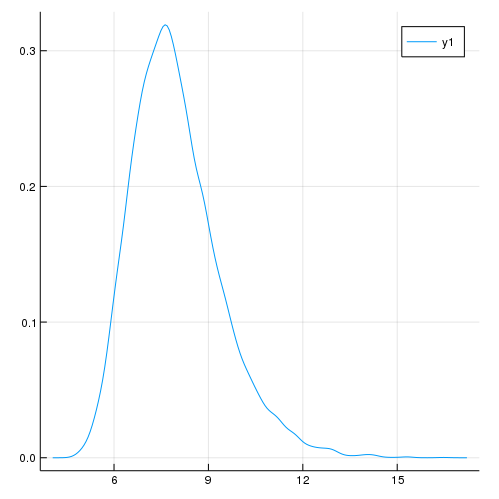

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*